In [109]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from meteostat import Point, Daily, units

In [98]:
# Set time period
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

In [99]:
# Create Point for location
mtwashington = Point(44.2691, -71.3020,2000)
blackmtn = Point(45.18, -70.67,750)
saddleback = Point(44.11, -68.54, 1255)
saddleback.radius=95000
powdermtn = Point(40.15, -112.18, 2775)

In [113]:
# Get daily data
data = Daily(mtwashington, start, end)
data = data.convert(units.imperial)
data = data.fetch()

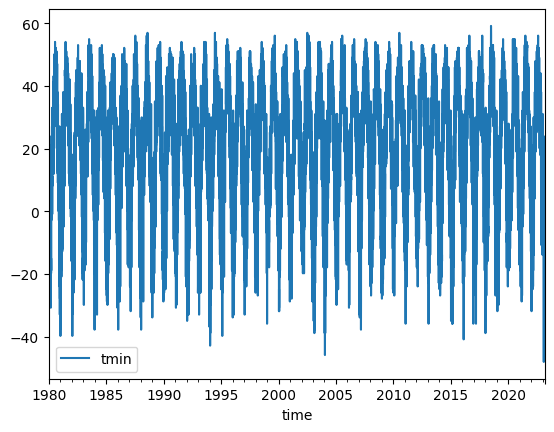

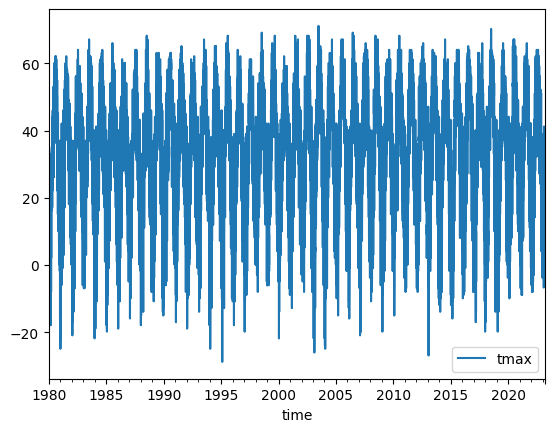

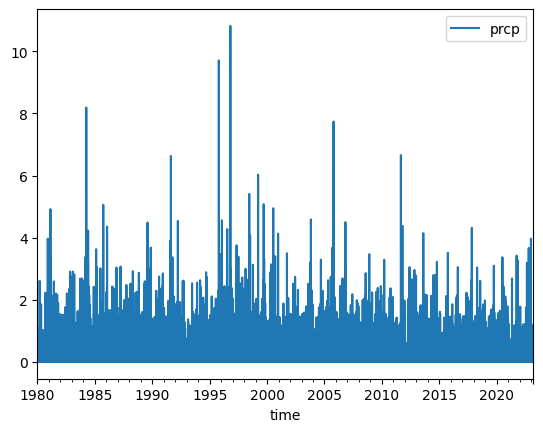

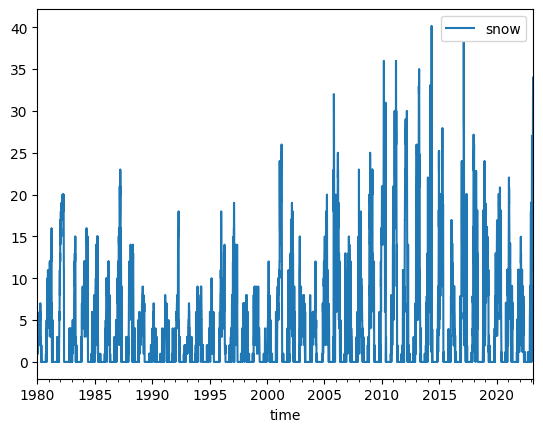

In [114]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tmin'])
data.plot(y=['tmax'])
data.plot(y=['prcp'])
data.plot(y=['snow'])
plt.show()

In [115]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1980-01-01,NaN,15.1,23.2,0.000,0.984,NaN,NaN,34.4,NaN,546.0
1980-01-02,NaN,1.0,18.1,0.000,0.984,NaN,NaN,58.6,NaN,396.0
1980-01-03,NaN,-10.8,2.1,0.051,0.984,NaN,NaN,67.8,NaN,552.0
1980-01-04,NaN,-6.9,10.0,0.000,0.984,NaN,NaN,72.5,NaN,552.0
1980-01-05,NaN,-1.8,11.1,0.000,0.984,NaN,NaN,57.5,NaN,354.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-06,5.7,4.1,9.5,0.000,NaN,318.0,74.9,NaN,1014.0,NaN
2023-03-07,10.8,0.5,16.7,0.079,NaN,340.0,29.6,NaN,1010.9,NaN
2023-03-08,16.0,9.5,22.1,0.067,NaN,358.0,37.7,NaN,1020.7,NaN


In [117]:
data = data.reset_index()
data['time'] = pd.to_datetime(data['time'])
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
data['decade'] = [math.floor(x/10) * 10 for x in data['year']]

In [118]:
data

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,month,year,decade
0,1980-01-01,NaN,15.1,23.2,0.000,0.984,NaN,NaN,34.4,NaN,546.0,1,1980,1980
1,1980-01-02,NaN,1.0,18.1,0.000,0.984,NaN,NaN,58.6,NaN,396.0,1,1980,1980
2,1980-01-03,NaN,-10.8,2.1,0.051,0.984,NaN,NaN,67.8,NaN,552.0,1,1980,1980
3,1980-01-04,NaN,-6.9,10.0,0.000,0.984,NaN,NaN,72.5,NaN,552.0,1,1980,1980
4,1980-01-05,NaN,-1.8,11.1,0.000,0.984,NaN,NaN,57.5,NaN,354.0,1,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15770,2023-03-06,5.7,4.1,9.5,0.000,NaN,318.0,74.9,NaN,1014.0,NaN,3,2023,2020
15771,2023-03-07,10.8,0.5,16.7,0.079,NaN,340.0,29.6,NaN,1010.9,NaN,3,2023,2020
15772,2023-03-08,16.0,9.5,22.1,0.067,NaN,358.0,37.7,NaN,1020.7,NaN,3,2023,2020
15773,2023-03-09,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,3,2023,2020
